<a href="https://www.kaggle.com/code/faduregis/mnist-digit-classification-in-pytorch?scriptVersionId=159176232" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# # **MNIST Digit Classification In Pytorch**

# Dataset Information
The MNIST dataset contains 28 by 28 grayscale images of single handwritten digits between 0 and 9. The set consists of a total of 70,000 images, the training set having 60,000 and the test set has 10,000. This means that there are 10 classes of digits, which includes the labels for the numbers 0 to 9.

For this model, I chose to build a simple feed-forward neural network, that looks something like this:

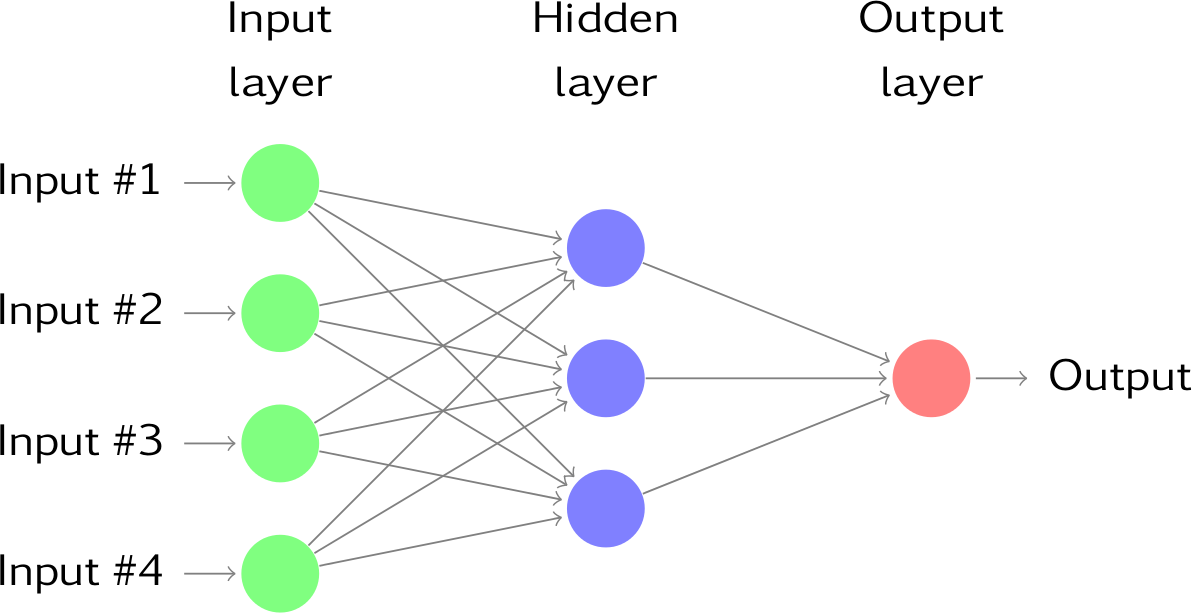

First, let's start by importing the necessary libraries we need.

In [1]:
import torch as t
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

1. For this project, we’ll use Pytorch, and we’ll import it as “t”.
2. We’ll get our dataset from torchvision.datasets, and we’ll import it as “datasets”.
3. Then we will import torchvision.transforms so we can transform our image to fit our model.
4. Now we’ll import torch.nn as nn, and we will use this to build our actual neural network.
5. Lastly, we’ll import matplotlib to visualize our results at the end.

# **Data**

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In the process of building any neural network, it is important to make sure your data is fit for the model.

Usually, when dealing with an image, text, audio, or video footage, you would use python packages to load that data into a NumPy array, and then convert the array into a tensor. Fortunately, PyTorch makes our lives easier by offering a library called torchvision. What this library does is provide us with some pretty useful things such as dataloaders, datasets, and data transformers for pixelated images.

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In this model, we’ll first need to transform the images into a suitable form that could work with the model.

Let's break down the composition of this. Essentially the composition of transform is:

transform = (Normalize ° ToTensor)

The point of transform is to put our data into a format that can be perceived by the model.

Next, we have our training set, testing set, train loader, and test loader.

When you have large amounts of data, you’ll want to use the DataLoader class, because they generate your data on multiple cores in real-time, and straight away feed it into your deep learning model.

We can give a DataLoader a batch_size, which denotes the number of samples contained in each generated batch, and we can give the DataLoader shuffle so that the data sequence is randomized.

# **The Model**

In [4]:
#build model
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) #28 * 28 is the pixels for each image
        self.linear2 = nn.Linear(100, 50) #100 and 5o
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()
# Here we are just feeding the data into each layer, and returning the output,
# while defining an instance of this class.
    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

This is the class of the neural network. As mentioned previously, we are just working with a simple feedforward network that has 3 layers: an input layer, a hidden layer, and an output layer.

Self.linear1 is the input layer and takes in the parameters 28*28 because those are the amounts of pixels in each image, as well as 100 which is the size of the output.

Self.linear2 is the hidden layer, which takes in the output of the previous layer for the input, and has an output size of 50.

Finally self.final is the output layer which takes in the output of the previous layer for the input and will output size of 10 since we have 10 values within this dataset (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).

After defining the layers of our network, we will add a ReLU activation function. Essentially this is a piecewise linear function that will output the input if it is positive, otherwise outputting the value of zero. This activation function is very popular for many types of neural networks because it makes the model generally easier to train and can often give a model a better performance.

Now we have the forward function which will actually feed the data through our network.

Before feeding in any information, we must use img.view(-1, 28*28) to reshape the images for the model.

# **Loss Function**

In [5]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    net.train()

    for data in test_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

Our model needs a loss function to evaluate how well the network models the dataset. Essentially if your predictions are totally off, your loss function will show you a higher number, whereas if they are pretty good, you’ll receive a lower number.

We will use cross-entropy for our loss function. This function is a measure of the difference between two probability distributions when given a random set of events (our dataset).

Also defined is our optimizer, which is Adam. The purpose of an optimizer is to apply a gradient to the network and to make the network learn. A good optimizer is able to train the model fast while preventing the model from getting stuck in a local minimum. It is important to have a good learning rate, which is the parameter in an optimization function that determines the step size for each iteration while moving toward a minimum of a loss function.

Lastly, we’ll have an epoch size of 10, an epoch referring to once cycle through the full training set. It is essential to find the right epoch size, too small of an epoch can risk the model not learning enough, and too big of an epoch can lead to overfitting.

* We are going to iterate over the range of epochs and call the train() function on our model.

* x will represent the batch of features, and y will represent the batch of targets.

* We need optimizer.zero_grad() to set the gradients to 0 before each loss calculation.

* net(x.view(-1, 28*28)) will pass in our reshaped batch.

* Then we will use our cross-entropy function to calculate and grab the loss value.

* After we need loss.backward() to apply the loss back through the network’s parameters.

* Finally, we need optimizer.step() to optimize weights to account for loss and gradients.

**Summarized:**

1. Get the features and labels from the current batch.
2. Zero the gradients.
3. Pass the dataset through the network.
4. Perform loss calculation.
5. Adjust weights within the network to decrease loss.

# **Evaluating Our Dataset**

In [6]:
correct = 0
total = 0

with t.no_grad():
    for data in train_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.941


Here we want to use t.no_grad() to eliminate counting gradients, and we need to do this while putting the network through our test set. Essentially we just want to see how “right” or “wrong” the network is at this point. This loop will iterate over the test set and measure for correctness but comparing output to target values. Afterwards, we will receive an accuracy summary.

# **Visualization**
We’ve now completed our network and the functions necessary, although, it is nice to add some visualization to show the data it is working with and if the results match the handwritten digits.

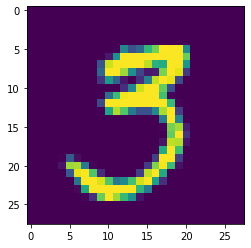

tensor(3)


In [7]:
#visualization
plt.imshow(x[3].view(28, 28))
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0]))

This block of code will show the MNIST data using matplotlib, and print the tensor. If the tensor and image on matplotlib have the same values, then you have successfully trained this neural net to recognize handwritten digits from the MNIST dataset.